In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(data.isnull().sum())

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


In [5]:
features = data[['Annual_Income', 'Spending_Score']]

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_

In [8]:
data['Cluster'] = cluster_labels

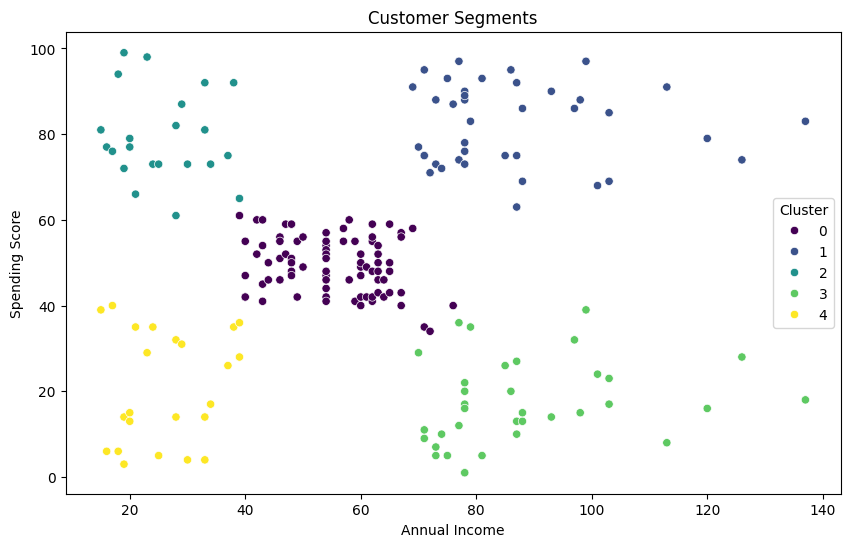

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual_Income'], y=data['Spending_Score'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

In [10]:
print(cluster_labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [11]:
data['Cluster'].head()

0    4
1    2
2    4
3    2
4    4
Name: Cluster, dtype: int32

In [17]:
def assign_member_type(cluster):
    if cluster == 4:
        return "Supreme"
    elif cluster == 3:
        return "Prime"
    elif cluster == 2:
        return "Pro"
    elif cluster == 1:
        return "Normal"
    elif cluster == 0:
        return "New"

In [18]:
data['MemberType'] = data['Cluster'].apply(assign_member_type)

In [19]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster,MemberType
0,1,Male,19,15,39,4,Supreme
1,2,Male,21,15,81,2,Pro
2,3,Female,20,16,6,4,Supreme
3,4,Female,23,16,77,2,Pro
4,5,Female,31,17,40,4,Supreme
